In [3]:
# Oneza Vhora
# Project 2 - COE379L

In [4]:
#Part 1: perform EDA on the dataset
import pandas as pd
data = pd.read_csv('california_housing.csv')
print("shape: ", data.shape)
print("size: ", data.size) 

shape:  (20634, 9)
size:  185706


/tmp/ipykernel_252/3267297125.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
#Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20634 entries, 0 to 20633
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MedInc              20634 non-null  float64
 1   HouseAge            20634 non-null  float64
 2   AveRooms            20634 non-null  float64
 3   AveBedrms           20634 non-null  float64
 4   Population          20634 non-null  float64
 5   AveOccup            20634 non-null  float64
 6   Latitude            20634 non-null  float64
 7   Longitude           20634 non-null  float64
 8   price_above_median  20634 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB


In [6]:
#Checking for duplicates, deleting them and printing the shape of the dataset
duplicates = data.duplicated().sum()
print("Number of duplicates: ", duplicates)
data = data.drop_duplicates()
print(data.shape)

Number of duplicates:  0
(20634, 9)


In [7]:
#Checking for missing values
data.isnull().sum()

MedInc                0
HouseAge              0
AveRooms              0
AveBedrms             0
Population            0
AveOccup              0
Latitude              0
Longitude             0
price_above_median    0
dtype: int64

In [8]:
#Checking for unique values in each column of the dataset
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in '{column}': {unique_values}")

Unique values in 'MedInc': [2.1827 3.0755 1.8235 ... 1.7311 4.3487 5.679 ]
Unique values in 'HouseAge': [26. 32. 40. 37. 13. 49. 34. 39. 35. 22. 24. 19. 27. 25. 10. 43. 21.  3.
 36.  6. 23. 38. 50. 52. 48. 15. 42. 47. 12. 29. 44. 11. 31. 20.  7. 17.
 45. 18. 14. 28. 16. 41. 30. 33.  4. 46.  5.  8.  9. 51.  2.  1.]
Unique values in 'AveRooms': [4.52142857 4.62306778 4.70114943 ... 5.78947368 5.27522936 5.25373134]
Unique values in 'AveBedrms': [0.92142857 0.98335315 1.12643678 ... 1.02999434 1.01364629 1.01171459]
Unique values in 'Population': [ 305. 3868.  928. ... 7984. 3717. 6330.]
Unique values in 'AveOccup': [2.17857143 4.59928656 3.55555556 ... 2.34185304 3.52838428 3.93859649]
Unique values in 'Latitude': [40.05 32.77 37.75 33.99 33.97 37.78 34.05 33.96 35.33 36.72 34.1  38.43
 37.74 38.25 34.12 33.74 33.2  37.77 37.32 34.02 32.75 36.85 40.78 38.53
 36.77 38.41 32.81 38.04 40.39 38.59 36.09 32.71 33.95 33.21 34.11 37.96
 37.66 38.54 40.55 39.59 39.43 37.12 35.99 35.32 36.68 37.3

In [9]:
# Get statistical information about the dataset
print(data.describe().T)
print(data.median())


                      count         mean          std         min         25%  \
MedInc              20634.0     3.870795     1.899796    0.499900    2.563925   
HouseAge            20634.0    28.640399    12.584629    1.000000   18.000000   
AveRooms            20634.0     5.429171     2.474393    0.846154    4.440930   
AveBedrms           20634.0     1.096628     0.473929    0.333333    1.006067   
Population          20634.0  1425.398081  1132.137403    3.000000  787.000000   
AveOccup            20634.0     3.070449    10.387501    0.692308    2.429649   
Latitude            20634.0    35.631722     2.135738   32.540000   33.930000   
Longitude           20634.0  -119.569594     2.003457 -124.350000 -121.800000   
price_above_median  20634.0     0.500000     0.500012    0.000000    0.000000   

                            50%          75%           max  
MedInc                 3.534950     4.743550     15.000100  
HouseAge              29.000000    37.000000     52.000000  
AveRoo

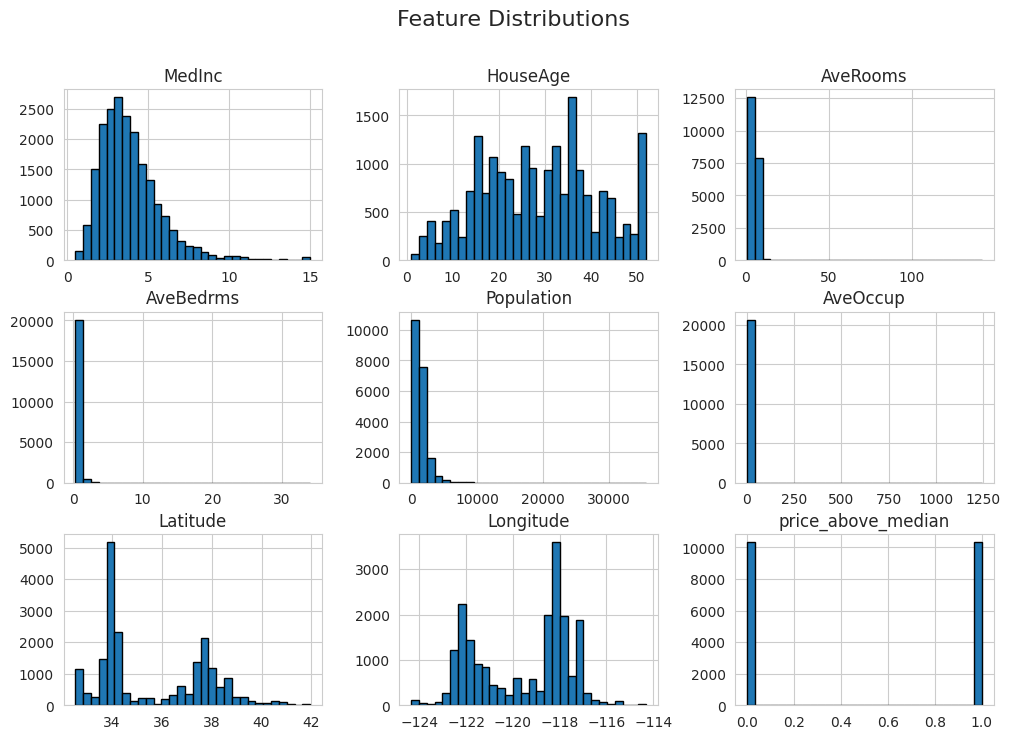

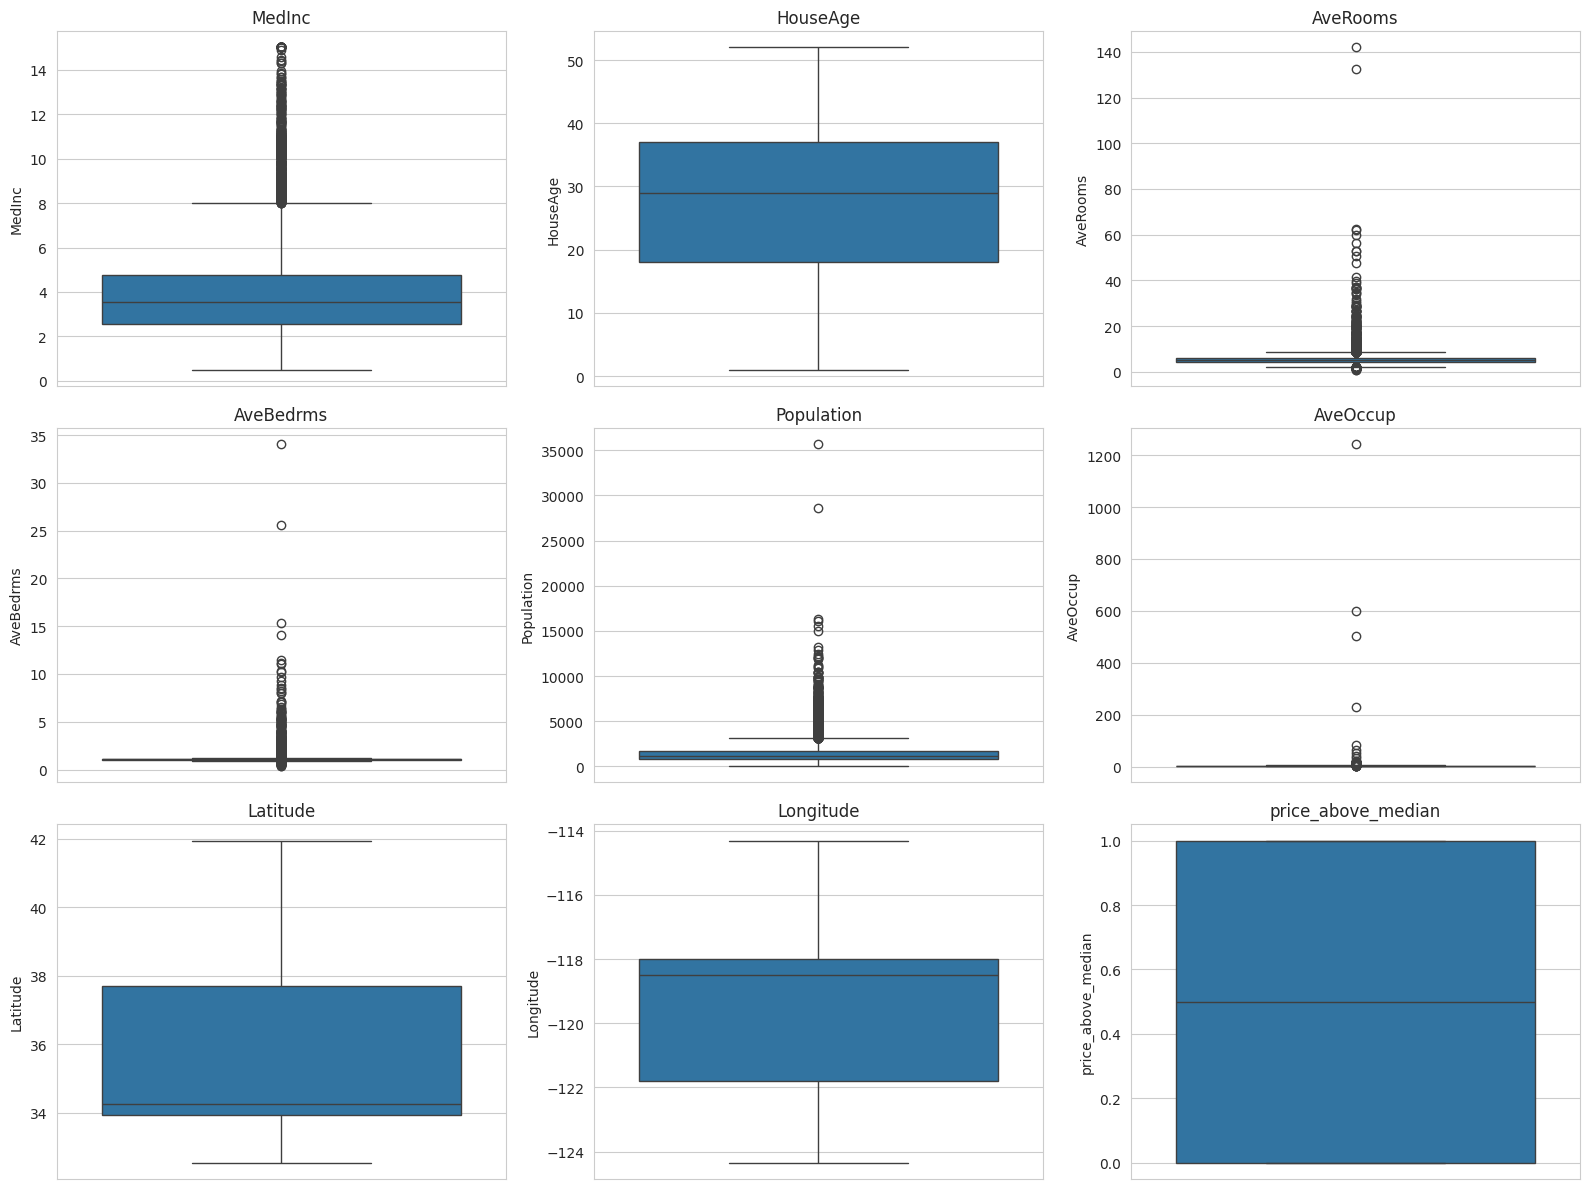

In [10]:
#Univariate Analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Histograms for distribution analysis
data.hist(figsize=(12, 8), bins=30, edgecolor='k')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(16, 12))
for i, col in enumerate(data.columns, 1):
    plt.subplot(3, 3, i)  # Adjusting for 9 columns
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

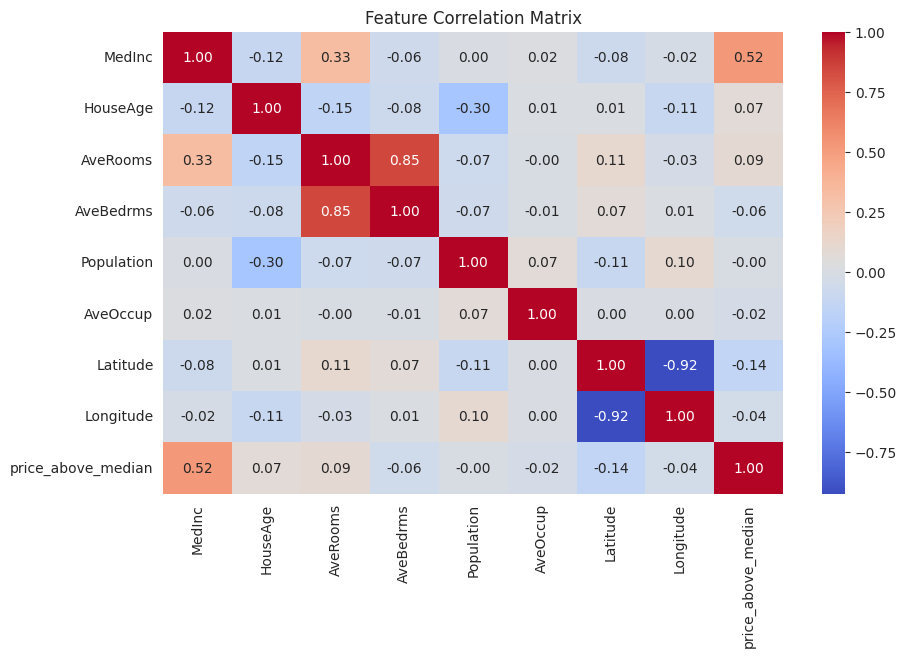

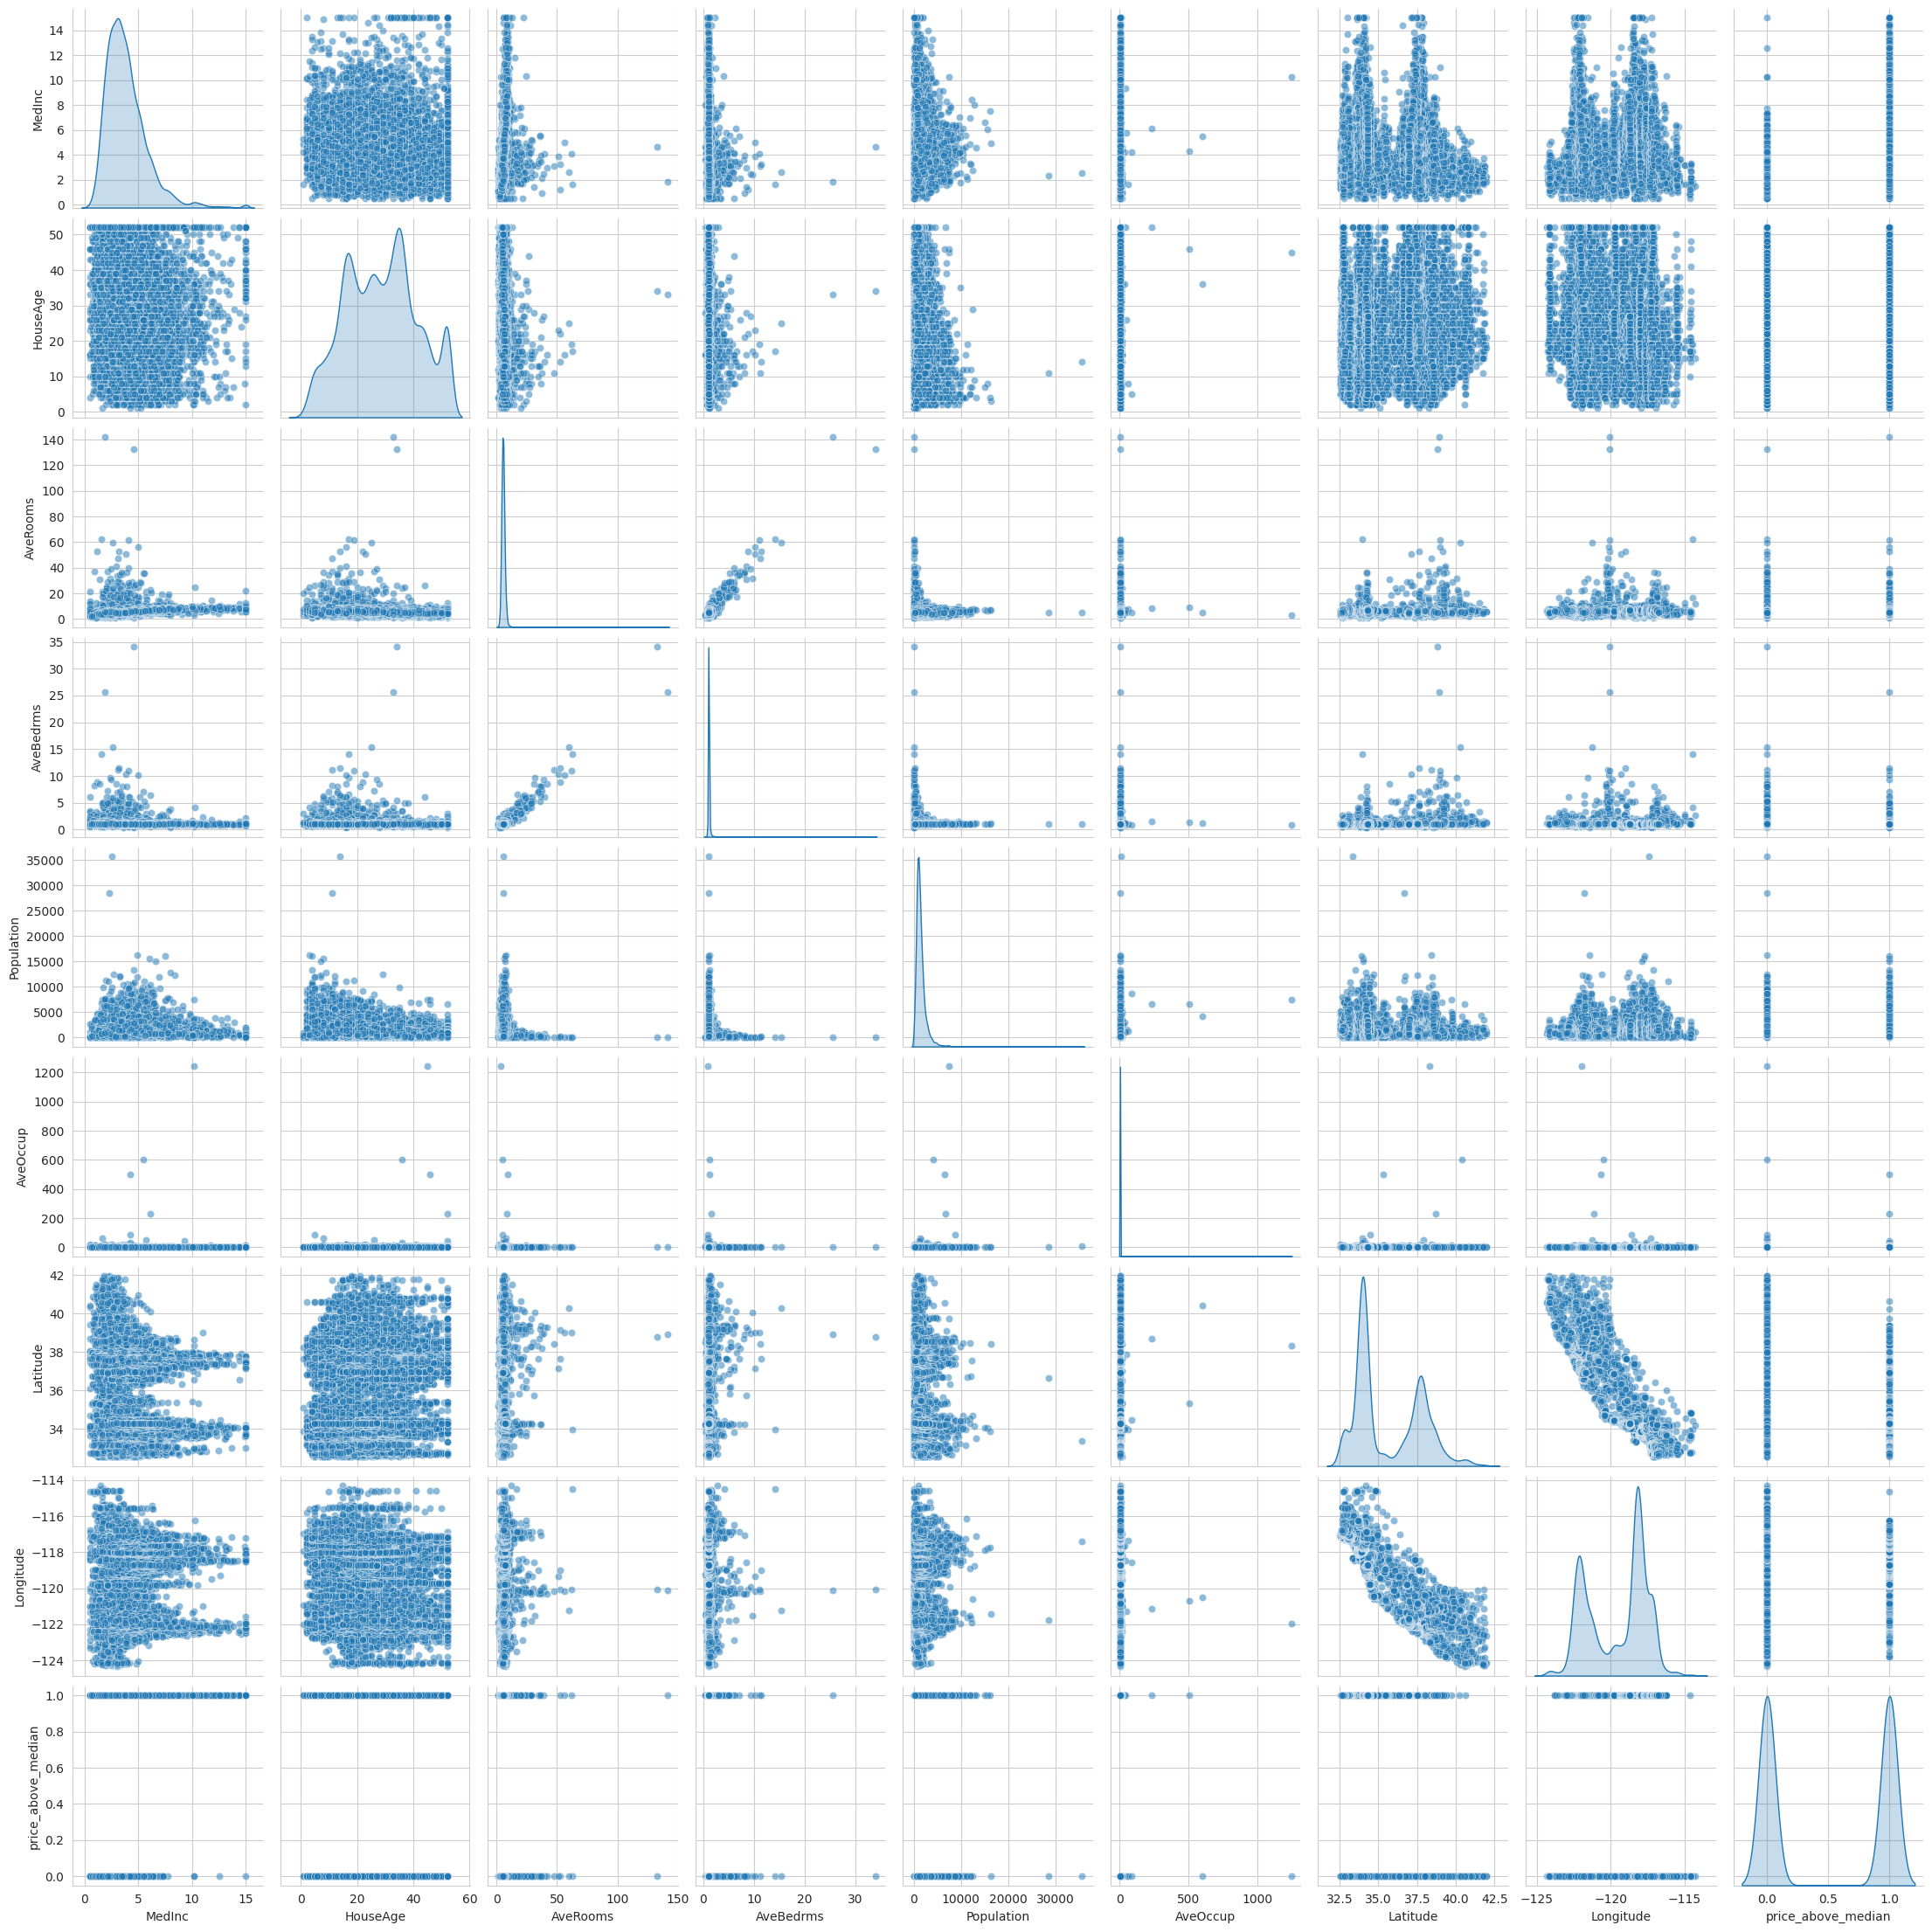

In [11]:
# Compute correlation matrix, (used chatGPT to help understand and code scattor plot line)
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Scatter plots to explore relationships
sns.pairplot(data, diag_kind="kde", plot_kws={'alpha':0.5})
plt.show()

In [12]:
#Part 2: Classification techniques
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Splitting the dataset into features and target variable
X = data.drop("price_above_median", axis=1)
y = data["price_above_median"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model training, classification and evaluation
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"Model: {name}")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    print("\n")

Model: Logistic Regression
Training Accuracy: 0.8410371357605864
Testing Accuracy: 0.8364429367579356
Confusion Matrix:
 [[1734  338]
 [ 337 1718]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2072
           1       0.84      0.84      0.84      2055

    accuracy                           0.84      4127
   macro avg       0.84      0.84      0.84      4127
weighted avg       0.84      0.84      0.84      4127



Model: K-Nearest Neighbors
Training Accuracy: 0.887986914642273
Testing Accuracy: 0.8274775866246669
Confusion Matrix:
 [[1732  340]
 [ 372 1683]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      2072
           1       0.83      0.82      0.83      2055

    accuracy                           0.83      4127
   macro avg       0.83      0.83      0.83      4127
weighted avg       0.83      0.83      0.83      4127




In [ ]:
# hyperparameter tuning for models
# chose the best hyperparameters for each mode
# did not do this part before, because I wanted to see performance of models before tuning, 
# and to see if tuning would improve performance.
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {"C": [0.01, 0.1, 1, 10, 100]},
    "K-Nearest Neighbors": {"n_neighbors": [3, 5, 7, 9], "weights": ["uniform", "distance"]},
    "Decision Tree": {"max_depth": [5, 10, 15], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [50, 100, 200], "max_depth": [5, 10, 15]},
    "AdaBoost": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 1]}
}

# Initialize models
p_models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

#used chatGPT to help understand syntax and code hyperparameter tuning, training
best_models = {}
for name, model in p_models.items():
    print(f"Tuning hyperparameters for {name}...")
    
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring="accuracy", n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# evaluate models
for name, model in best_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(f"Model: {name}")
    print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
    print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
    print("Classification Report:\n", classification_report(y_test, y_pred_test))
    print("\n") 


Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 100}
Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'weights': 'distance'}
Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 15, 'n_estimators': 200}
Tuning hyperparameters for AdaBoost...
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Model: Logistic Regression
Training Accuracy: 0.8421275822378385
Testing Accuracy: 0.8381390840804458
Confusion Matrix:
 [[1739  333]
 [ 335 1720]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      2072
           1       0.84      0.84      0.84      2055

    accuracy                           0.84      4127
   macro avg       0.84 